# News Mood

- Each news sources has moderately negative sentiment at the time of analysis.
- The most negative and most positive tweets occurred within the last 20 tweets.
- It would seem that a majority of each news sources tweets' were graded with neutral compound sentiment (0).

In [ ]:
consumer_key = "r1CGEJjGlrTmuUILfpJOYboYX"
consumer_secret = "PaAN0u5xUEB6FW59ZtQw9DHS95WWj1d9jzchbxXFVGQrGpvA4R"
access_token = "901933530258829312-y9BaHYc1jigRcWrWuGxcs0eYomJMY12"
access_token_secret = "KCSTd4QoPgiPwtYo0MSo185ACE2vPS5WLOrqnAd3xFsxx"

In [ ]:
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import time

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [ ]:
tweet_df = pd.DataFrame(columns = ["Source Account", "Tweet Text", "Date", "Tweets Ago", "Compound Sentiment", "Positive Sentiment", "Neutral Sentiment", "Negative Sentiment"])

In [ ]:
target_user = ["BBCNews", "CBSNews", "CNN", "FoxNews", "nytimes"]
indexcount = 0
comp_avg = []

In [ ]:
for user in target_user:
    public_tweets = api.user_timeline(user, count=100)
    tweetnumber = 0
    comp_list = []
    for tweet in public_tweets:
        search = tweet["text"]
        tweetdate = tweet["created_at"]
        compoundsent = analyzer.polarity_scores(search)["compound"]
        comp_list.append(analyzer.polarity_scores(search)["compound"])
        positivesent = analyzer.polarity_scores(search)["pos"]
        neutralsent = analyzer.polarity_scores(search)["neu"]
        negativesent = analyzer.polarity_scores(search)["neg"]
        tweet_df.set_value(indexcount, "Source Account", user)
        tweet_df.set_value(indexcount, "Tweet Text", search)
        tweet_df.set_value(indexcount, "Date", tweetdate)
        tweet_df.set_value(indexcount, "Tweets Ago", tweetnumber)
        tweet_df.set_value(indexcount, "Compound Sentiment", compoundsent)            
        tweet_df.set_value(indexcount, "Positive Sentiment", positivesent)
        tweet_df.set_value(indexcount, "Neutral Sentiment", neutralsent)
        tweet_df.set_value(indexcount, "Negative Sentiment", negativesent)
        indexcount = indexcount + 1
        tweetnumber = tweetnumber + 1
    comp_avg.append(np.mean(comp_list))

In [ ]:
comp_avg

In [ ]:
tweet_df

In [ ]:
#export to csv for final file
tweet_df.to_csv("newssen")

In [ ]:
x_axis = (100, 0, 1)
bbcplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "BBCNews"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "BBCNews"]["Compound Sentiment"], marker="o", c="turquoise", edgecolors="black", linewidth=1 ,s=125, alpha=1, label="BBC")
cbsplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "CBSNews"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "CBSNews"]["Compound Sentiment"], marker="o", facecolors="green", edgecolors="black", linewidth=1, s=125, alpha=1, label="CBS")
cnnplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "CNN"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "CNN"]["Compound Sentiment"], marker="o", facecolors="red", edgecolors="black", linewidth=1,s=125, alpha=1, label="CNN")
foxplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "FoxNews"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "FoxNews"]["Compound Sentiment"], marker="o", facecolors="blue", edgecolors="black", linewidth=1,s=125, alpha=1, label="Fox")
nytplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "nytimes"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "nytimes"]["Compound Sentiment"], marker="o", facecolors="yellow", edgecolors="black", linewidth=1,s=125, alpha=1, label="New York Times")
leg = plt.legend(title="Media Sources",fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(leg.get_title(),fontsize=14)
bbox_inches="tight"
plt.title("Sentiment Analysis of Media Tweets " + str(time.strftime("%x")), fontsize=16)
plt.xlabel("Tweets Ago", fontsize=14)
plt.ylabel("Tweet Polarity", fontsize=14)
plt.ylim(-1.1, 1.1)
plt.xlim(105, -5)
plt.savefig("newsent1.png")
plt.show()

In [ ]:
#tweet_df.groupby('Source Account')["Compound Sentiment"].mean()
tweet_df.info()


In [92]:
plt.figure(figsize=(10,7))
x_axis2 = np.arange(len(target_user))

rect1 = plt.bar(0, comp_avg[0], color='turquoise', alpha=1, align="edge", ec="black", width=1)
rect2 = plt.bar(1, comp_avg[1], color='green', alpha=1, align="edge", ec="black", width=1)
rect3 = plt.bar(2, comp_avg[2], color='red', alpha=1, align="edge", ec="black", width=1)
rect4 = plt.bar(3, comp_avg[3], color='blue', alpha=1, align="edge", ec="black", width=1)
rect5 = plt.bar(4, comp_avg[4], color='yellow', alpha=1, align="edge", ec="black", width=1)

tick_locations = [value+0.5 for value in x_axis2]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, target_user)
plt.xlim(0, 5)
plt.ylim(-.2, .05)

(-0.2, 0.05)

In [93]:
plt.title("Overall Media Sentiment Based on Twitter " + str(time.strftime("%x")), fontsize=20)
plt.ylabel("Tweet Polarity")

In [94]:
def label_negative(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., (height)-0.01,
                '-%.2f' % float(height),
                ha='center', va='bottom')


label_negative(rect1)
label_negative(rect2)
label_negative(rect3)
label_negative(rect4)
label_negative(rect5)

In [95]:
plt.savefig("newsent2.png")

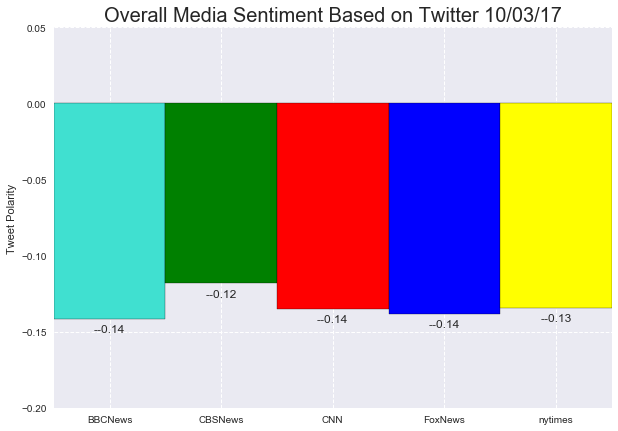

In [96]:
plt.show()